In [373]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('D:/USER/Desktop/JAT/機器學習/Final/phishing websites/Training Dataset.arff')
df = pd.DataFrame(data[0])

In [374]:
#data preprocessing
df += 1 # catgoricalNB only accepts
x = df.drop(columns = ['Statistical_report', 'Result'])
y = df['Result']

In [375]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [376]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

In [382]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(yTest, yPred)
print(acc)
pcs = precision_score(yTest, yPred, pos_label = 0)
print(pcs)
rcl = recall_score(yTest, yPred, pos_label = 0)
print(rcl)
cm = confusion_matrix(yTest, yPred, labels=[0, 2])

0.9261380765752185
0.9368421052631579
0.8959731543624161


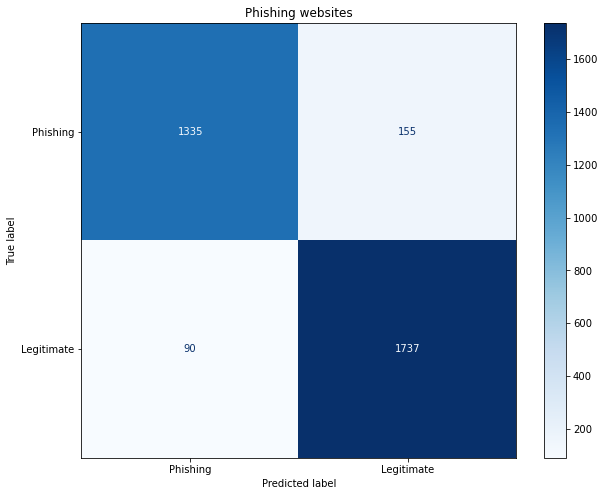

In [388]:
fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues, ax = ax)
disp.ax_.set(title = "Phishing websites")

plt.show()
fig.savefig("D:/USER/Desktop/JAT/機器學習/final/confusion_matrix_naiveBayes.jpg")

In [396]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly')
svc.fit(xTrain, yTrain)
yPred = svc.predict(xTest)

In [397]:
acc = accuracy_score(yTest, yPred)
print(acc)
pcs = precision_score(yTest, yPred, pos_label = 0)
print(pcs)
rcl = recall_score(yTest, yPred, pos_label = 0)
print(rcl)
cm = confusion_matrix(yTest, yPred, labels=[0, 2])

0.9514621646065722
0.95922598479613
0.9315436241610738


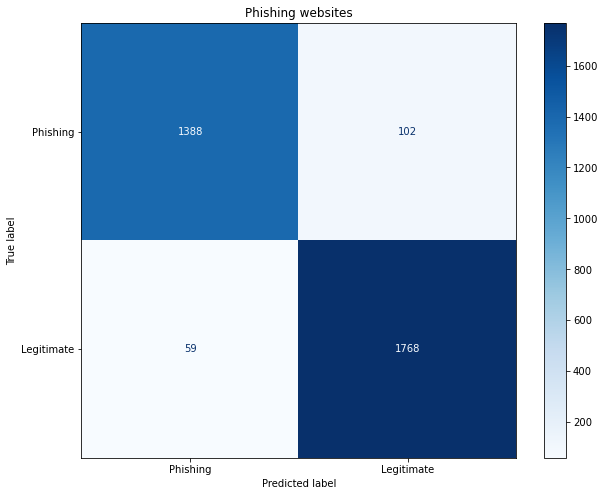

In [398]:
fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues, ax = ax)
disp.ax_.set(title = "Phishing websites")

plt.show()
fig.savefig("D:/USER/Desktop/JAT/機器學習/final/confusion_matrix_svc.jpg")

In [182]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = False, max_iter = 1000)
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

In [226]:
l = [ [df.columns[i], clf.coef_[0, i].round(2), abs(clf.coef_[0, i].round(2))] for i in range(xTrain.shape[1])]
df2 = pd.DataFrame(l, columns=["Features", "Weights", "Importance"])
df2 = df2.sort_values(by=['Importance'], ascending = False)
df2.style.hide_index()

Features,Weights,Importance
Redirect,-4.010000,4.010000
URL_of_Anchor,2.780000,2.780000
SSLfinal_State,1.490000,1.490000
RightClick,-1.000000,1.000000
Shortining_Service,-0.930000,0.930000
Prefix_Suffix,0.870000,0.870000
double_slash_redirecting,-0.840000,0.840000
SFH,0.680000,0.680000
port,0.570000,0.570000
on_mouseover,0.550000,0.550000


In [315]:
for i in range(19, xTrain.shape[1]):
    xTrain2 = xTrain.drop(columns = [df2["Features"][i]])
    xTest2 = xTest.drop(columns = [df2["Features"][i]])



In [299]:
clf = CategoricalNB()
clf.fit(xTrain2, yTrain)
yPred = clf.predict(xTest2)

In [300]:
acc = accuracy_score(yTest, yPred)
print(acc)

0.926439553813687


In [316]:
svc = SVC(kernel = 'poly')
svc.fit(xTrain2, yTrain)
yPred = svc.predict(xTest2)

In [317]:
acc = accuracy_score(yTest, yPred)
print(acc)

0.9472414832680133


In [405]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#fig = plt.figure(figsize = (100, 50))

dt = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 4)
dt.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
#plot_tree(dt, filled = True, feature_names = xTrain.columns, fontsize = 20)

#plt.show()
#fig.savefig("D:/USER/Desktop/JAT/機器學習/final/decision_tree.jpg")

In [400]:
acc = accuracy_score(yTest, yPred)
print(acc)
pcs = precision_score(yTest, yPred, pos_label = 0)
print(pcs)
rcl = recall_score(yTest, yPred, pos_label = 0)
print(rcl)
cm = confusion_matrix(yTest, yPred, labels=[0, 2])

0.9571902321374737
0.9578804347826086
0.9463087248322147


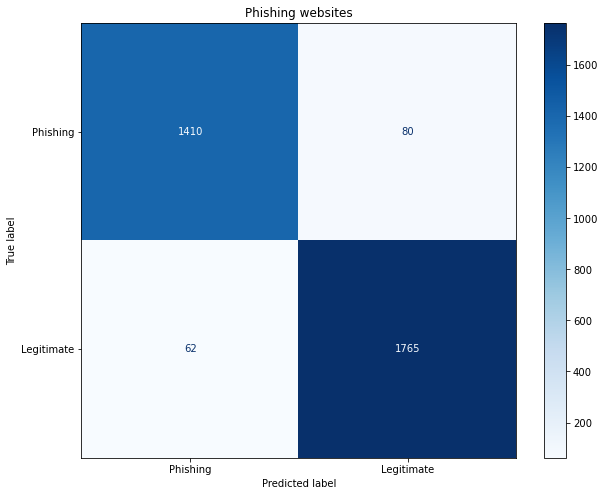

In [401]:
fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues, ax = ax)
disp.ax_.set(title = "Phishing websites")

plt.show()
fig.savefig("D:/USER/Desktop/JAT/機器學習/final/confusion_matrix_tree.jpg")

In [330]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xTrain3 = scaler.fit_transform(xTrain)
xTest3 = scaler.fit_transform(xTest)

In [347]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(xTrain3)
xTrainPCA = pca.transform(xTrain3)
xTestPCA = pca.transform(xTest3)

In [345]:
svc = SVC(kernel = 'poly')
svc.fit(xTrain, yTrain)
yPred = svc.predict(xTest)

In [346]:
acc = accuracy_score(yTest, yPred)
print(acc)

0.9514621646065722
